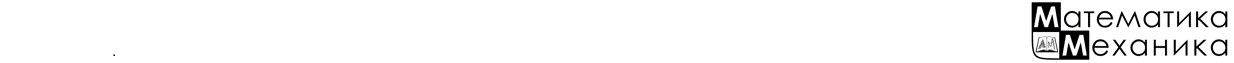

In [2]:
%matplotlib notebook
from random import randint
import time
import matplotlib.pyplot as plt

# У чисел, среди которых мы будем искать наибольшее
# есть ограничение : это натуральные числа не больше
# M = 1000
M = 1000


initial_array_size = 1000
final_array_size = 10000
step_size = 25
array_sizes = list(range(initial_array_size, final_array_size + 1, step_size))
# Можно, конечно, сразу сгенерировать массивы из случайных элементов для каждого размера,
# но для большей случайности, генерируем их отдельно для каждого из четырех способов

## Способ 1

In [33]:
def first_approach_function(lst):
    sorted_lst = sorted(lst)
    counter = 0
    max_counter = 0
    prev_elem = lst[0]
    for elem in sorted_lst[1:]:
        if elem != prev_elem:
            if counter > max_counter:
                max_counter = counter
                most_frequent_elem = prev_elem
            counter = 0
        counter += 1
        prev_elem = elem
    return most_frequent_elem

## Способ 2

In [25]:
def second_approach_function(lst):
    frequency_dict = {}
    for elem in lst:
        corresponding_counter = frequency_dict.get(elem)
        if corresponding_counter is None:
            frequency_dict[elem] = 1
        else:
            frequency_dict[elem] += 1
    return max(frequency_dict, key=lambda key : frequency_dict[key])

## Способ 3

In [ ]:
def third_approach_function(lst):
    """
    То же самое, что и через словарь, но
    вместо ключей используются индексы в массиве,
    т.е. элемент 49 - значит прибавляем единицу к
    сорок девятой ячейке, которая была до этого нулем
    (вспомогательный массив инициализируется нулевым)
    """
    auxillary_length = max(lst)
    counter_lst = [0] * auxillary_length
    for i in lst:
        counter_lst[i] += 1
    most_frequent_el = max(counter_lst)
    return counter_lst.index(most_frequent_el)

## Способ 4

In [3]:
import numpy as np

def fourth_approach_function(lst):
    np_lst = np.array(lst)
    frequency_lst = np.bincount(np_lst)
    return (np.where(frequency_lst == max(frequency_lst))[0][0])

### Проверка корректности

<IPython.core.display.Javascript object>


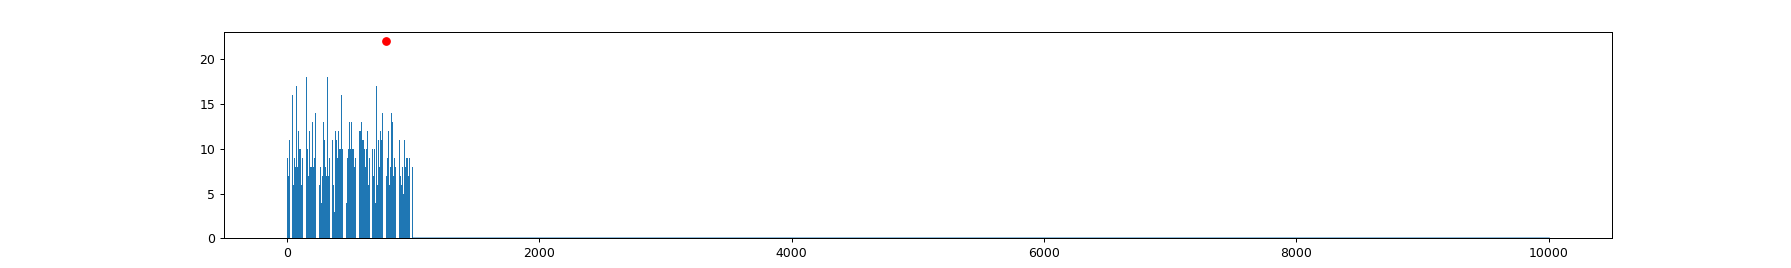

In [5]:
test_lst_4 = np.array([randint(1, M + 1) for _ in range(10000)])
# Найдем частоту вхождения каждого элемента в
# этот массив, используя встроенную функцию, в корректности работы
# которой мы уверены
# У нас в массиве только натуральные числа и есть max значение - то что нужно bincount.
# bincount создает массив
# длиною max (получается, всем возможным элементам массива мы сопоставляем
# ячейку). Например, можем охарактеризовать частотность каждого элемента в
# массиве [1, 1, 3, 5, 3] через bincount следующим образом : 
# [2, 0, 2, 0, 1] - частота вхождения
# [1, 2, 3, 4, 5] - индекс, соответсвующий элементу массива
# т.е. для элемента величиной N его частота хранится в 
# ячейке массива с индексом N - 1
frequency_lst_4 = np.bincount(test_lst_4)
# При помощи написанной нами функции находим самый частый элемент
fourth_appoach_result = fourth_approach_function(test_lst_4)
# Задаем размер графика. Меньше его делать не стоит, поскольку
# могут не отрисоваться значения
plt.rcParams["figure.figsize"] = (20,3)
# Строим график. bar строит немного иначе, чем plot
plt.bar(list(range(len(frequency_lst_4))), frequency_lst_4)
# Ставим найденный нами самый частый элемент. Наша функция возвращает
# только его значение, но не частоту вхождения в массив, за ней 
# обращаемся к тому, что выдал нам прежде bincount
plt.plot(fourth_appoach_result, frequency_lst_4[fourth_appoach_result], 'ro')

### Наблюдение за временем выполнения

<IPython.core.display.Javascript object>


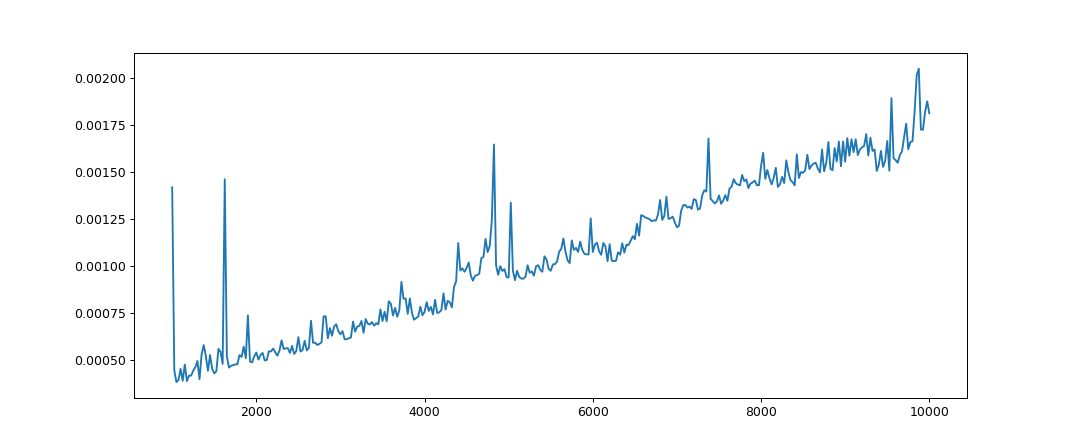

In [9]:
time_distribution_4 = []

# В цикле проходимся по заранее просчитанным размерам тестовых
# массивов
for array_size in array_sizes:
    # Для очередного размера генерируем массив из случайных чисел
    sample_array = [randint(1, M + 1) for _ in range(array_size)]
    # Замеряем, когда начали вычисления
    start_time = time.perf_counter()
    # Выполняем функцию на сгенерированном массиве
    fourth_approach_function(sample_array)
    # Отмечаем, когда закончили вычисления
    finish_time = time.perf_counter()
    delta_time = finish_time - start_time
    # Запоминаем, как долго мы вычисляли
    time_distribution_4.append(delta_time)

# Строим график : на оси X - размер массива, на Y - как долго
# мы проводили вычисления для такого размера
plt.rcParams["figure.figsize"] = (12,5)
plt.plot(array_sizes, time_distribution_4)